# R Data Analysis

After data cleaning was completed in Pandas, we are now attempting to run the analysis using R. The newly cleaned data will be uploaded as a csv and we will run multiple analysis to confirm whether or not the relationships we have proposed are supported in the data. We have also used R to continue to clean any other parts of the dataset that was necessary and not completed in Pandas

In [68]:
#reading the csv file 

setwd("~/Desktop/HRV/")


In [69]:
#creating DataFrame
DF<-read.csv("HRV_heart_rate_data.csv", header=T)



In [70]:
head(DF)

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992000,798.797,46.21180,695.6390,285.53000,827.04600,0.7433614,0.345241
200082,1,1,40,6,59.35540,0.996610,1010.860,39.43320,739.2121,531.02400,242.83100,0.3137939,2.186800
200108,2,1,60,5,64.95440,0.990741,923.725,27.72130,532.0790,168.40600,81.90150,0.3272035,2.056200
200109,2,1,71,6,76.86543,0.997389,780.585,8.41453,55.3561,8.87934,4.38036,0.3303514,2.027080
200112,1,1,48,5,62.34829,0.996785,962.336,88.53440,3987.3524,3269.69000,292.34900,0.0820735,11.184200
200116,2,3,83,6,60.18555,0.996667,996.917,35.31590,958.1760,291.28400,97.68640,0.2511410,2.981830


In [71]:
# The first row of the data, checking to make sure I am getting my header and data read correctly
DF[1, ]

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992,798.797,46.2118,695.639,285.53,827.046,0.7433614,0.345241


In [72]:
#Finding and removing rows with missing data
#The results of complete.cases() is a logical vector with 
#the value TRUE for rows that are complete, and FALSE for rows that have some NA values. 

str(DF)
complete.cases(DF)

'data.frame':	486 obs. of  14 variables:
 $ nsrrid  : int  200079 200082 200108 200109 200112 200116 200117 200123 200125 200133 ...
 $ gender_x: int  2 1 2 2 1 2 2 2 2 2 ...
 $ race_x  : int  3 1 1 1 1 3 1 1 1 1 ...
 $ age_s1_x: int  56 40 60 71 48 83 43 49 48 74 ...
 $ BLUE25  : num  5 6 5 6 5 6 5 6 5 5 ...
 $ ihr     : num  75.1 59.4 65 76.9 62.3 ...
 $ NN_RR   : num  0.992 0.997 0.991 0.997 0.997 ...
 $ AVNN    : num  799 1011 924 781 962 ...
 $ SDNN    : num  46.21 39.43 27.72 8.41 88.53 ...
 $ VLF     : num  695.6 739.2 532.1 55.4 3987.4 ...
 $ LF      : num  285.53 531.02 168.41 8.88 3269.69 ...
 $ HF      : num  827.05 242.83 81.9 4.38 292.35 ...
 $ HF_n    : num  0.7434 0.3138 0.3272 0.3304 0.0821 ...
 $ LF_HF   : num  0.345 2.187 2.056 2.027 11.184 ...


[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[169]  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[193] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[205] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[229]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[253]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[265]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[277]  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[289] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[313]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[337]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[349]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[361] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[385]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [73]:
#This is to remove the rows with missing data from DF
DF2 <- DF[complete.cases(DF), ]
str(DF2)

'data.frame':	449 obs. of  14 variables:
 $ nsrrid  : int  200079 200082 200108 200109 200112 200116 200117 200123 200125 200133 ...
 $ gender_x: int  2 1 2 2 1 2 2 2 2 2 ...
 $ race_x  : int  3 1 1 1 1 3 1 1 1 1 ...
 $ age_s1_x: int  56 40 60 71 48 83 43 49 48 74 ...
 $ BLUE25  : num  5 6 5 6 5 6 5 6 5 5 ...
 $ ihr     : num  75.1 59.4 65 76.9 62.3 ...
 $ NN_RR   : num  0.992 0.997 0.991 0.997 0.997 ...
 $ AVNN    : num  799 1011 924 781 962 ...
 $ SDNN    : num  46.21 39.43 27.72 8.41 88.53 ...
 $ VLF     : num  695.6 739.2 532.1 55.4 3987.4 ...
 $ LF      : num  285.53 531.02 168.41 8.88 3269.69 ...
 $ HF      : num  827.05 242.83 81.9 4.38 292.35 ...
 $ HF_n    : num  0.7434 0.3138 0.3272 0.3304 0.0821 ...
 $ LF_HF   : num  0.345 2.187 2.056 2.027 11.184 ...


In [74]:
#saving new dataframe as a csv and to be used as the dataframe for analysis
head(DF2)

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992000,798.797,46.21180,695.6390,285.53000,827.04600,0.7433614,0.345241
200082,1,1,40,6,59.35540,0.996610,1010.860,39.43320,739.2121,531.02400,242.83100,0.3137939,2.186800
200108,2,1,60,5,64.95440,0.990741,923.725,27.72130,532.0790,168.40600,81.90150,0.3272035,2.056200
200109,2,1,71,6,76.86543,0.997389,780.585,8.41453,55.3561,8.87934,4.38036,0.3303514,2.027080
200112,1,1,48,5,62.34829,0.996785,962.336,88.53440,3987.3524,3269.69000,292.34900,0.0820735,11.184200
200116,2,3,83,6,60.18555,0.996667,996.917,35.31590,958.1760,291.28400,97.68640,0.2511410,2.981830


In [62]:
write.csv(DF2,"cleanNIH.csv", row.names = TRUE)


In [75]:
head(DF2)

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992000,798.797,46.21180,695.6390,285.53000,827.04600,0.7433614,0.345241
200082,1,1,40,6,59.35540,0.996610,1010.860,39.43320,739.2121,531.02400,242.83100,0.3137939,2.186800
200108,2,1,60,5,64.95440,0.990741,923.725,27.72130,532.0790,168.40600,81.90150,0.3272035,2.056200
200109,2,1,71,6,76.86543,0.997389,780.585,8.41453,55.3561,8.87934,4.38036,0.3303514,2.027080
200112,1,1,48,5,62.34829,0.996785,962.336,88.53440,3987.3524,3269.69000,292.34900,0.0820735,11.184200
200116,2,3,83,6,60.18555,0.996667,996.917,35.31590,958.1760,291.28400,97.68640,0.2511410,2.981830


Here we are attempting to understand any surface level relationships between two variables. 
We know the parameter "BLUE25" is a range of values from low to severe (1 to 6) which grades depresssion levels of the assigned IDs ("nssrrid"). 

Our first linear regression analysis will be to see whether or not resting heart rate and depression are related. We also have a scatter plot to describe our initial analysis.

In [76]:
#assigning variables to do linear regression analysis
x= DF2$ihr

In [77]:
y=DF2$BLUE25

In [78]:
lm(ihr ~ BLUE25,data=DF2)


Call:
lm(formula = ihr ~ BLUE25, data = DF2)

Coefficients:
(Intercept)       BLUE25  
     74.035       -1.579  


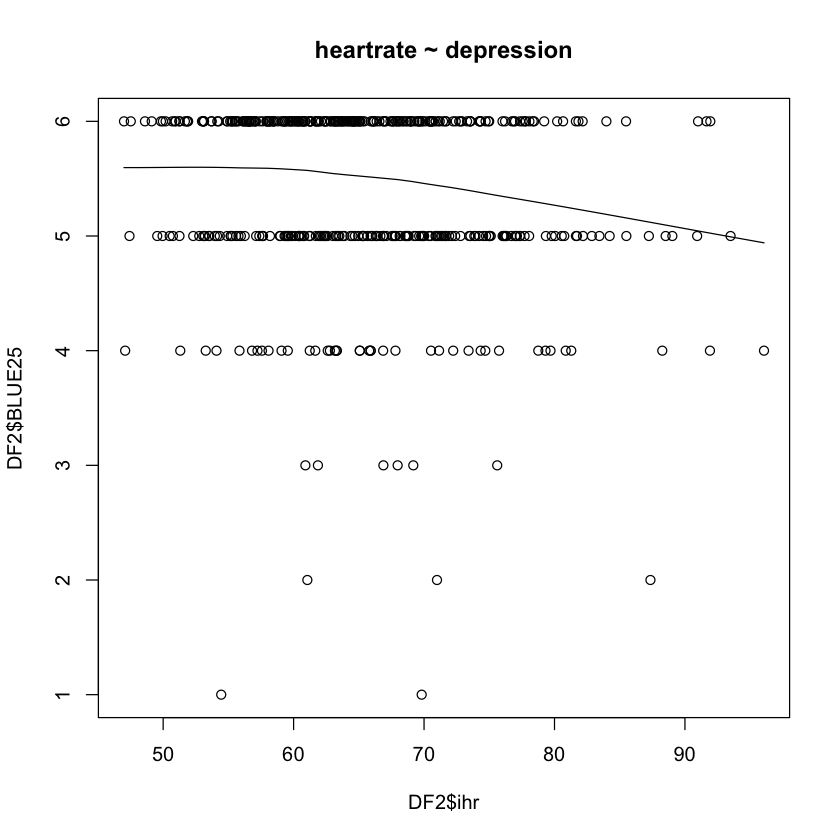

In [79]:
scatter.smooth(x=DF2$ihr, y=DF2$BLUE25, main="heartrate ~ depression")  # scatterplot

list()